In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
mnist=tf.keras.datasets.mnist

In [6]:
#returns two tuples with training and test data so no need for train test split
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [7]:
#normalizing the data i.e. scaling down so that every number is between zero and one
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

In [12]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=4)
model.save('handwritten.model')

Epoch 1/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2632 - accuracy: 0.9225
Epoch 2/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1062 - accuracy: 0.9672
Epoch 3/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0720 - accuracy: 0.9773
Epoch 4/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0535 - accuracy: 0.9826


INFO:tensorflow:Assets written to: handwritten.model\assets


INFO:tensorflow:Assets written to: handwritten.model\assets


In [13]:
#load the saved model
model=tf.keras.models.load_model('handwritten.model')

In [14]:
loss,accuracy=model.evaluate(x_test,y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.0799 - accuracy: 0.9759
0.07993892580270767
0.9758999943733215


1/1 [==============================] - 0s 60ms/step
ans is 5


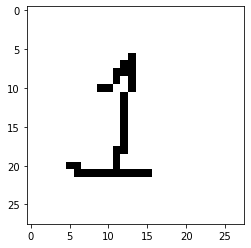

1/1 [==============================] - 0s 18ms/step
ans is 2


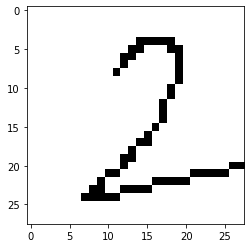

1/1 [==============================] - 0s 18ms/step
ans is 3


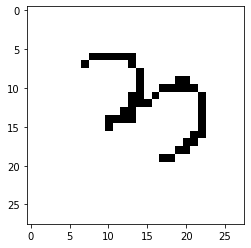

1/1 [==============================] - 0s 18ms/step
ans is 1


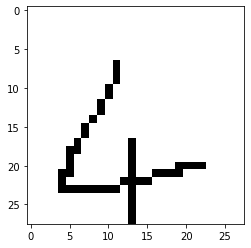

1/1 [==============================] - 0s 20ms/step
ans is 7


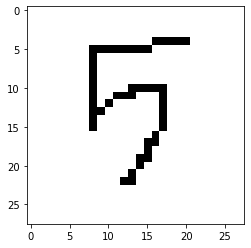

1/1 [==============================] - 0s 19ms/step
ans is 6


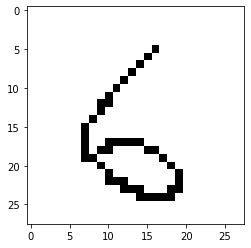

1/1 [==============================] - 0s 17ms/step
ans is 6


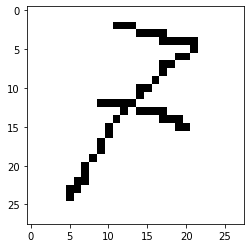

1/1 [==============================] - 0s 22ms/step
ans is 3


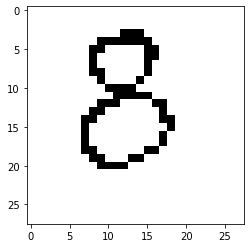

1/1 [==============================] - 0s 22ms/step
ans is 9


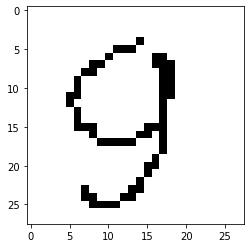

In [15]:
image_no=1
while os.path.isfile(f"test-images/{image_no}.png"):
    try:
        img=cv2.imread(f"test-images/{image_no}.png")[:,:,0]
        img=np.invert(np.array([img]))
        prediction=model.predict(img)
        print(f"ans is {np.argmax(prediction)}")
        plt.imshow(img[0],cmap=plt.cm.binary)
        plt.show()
    except:
        print("error")
    finally:
        image_no+=1